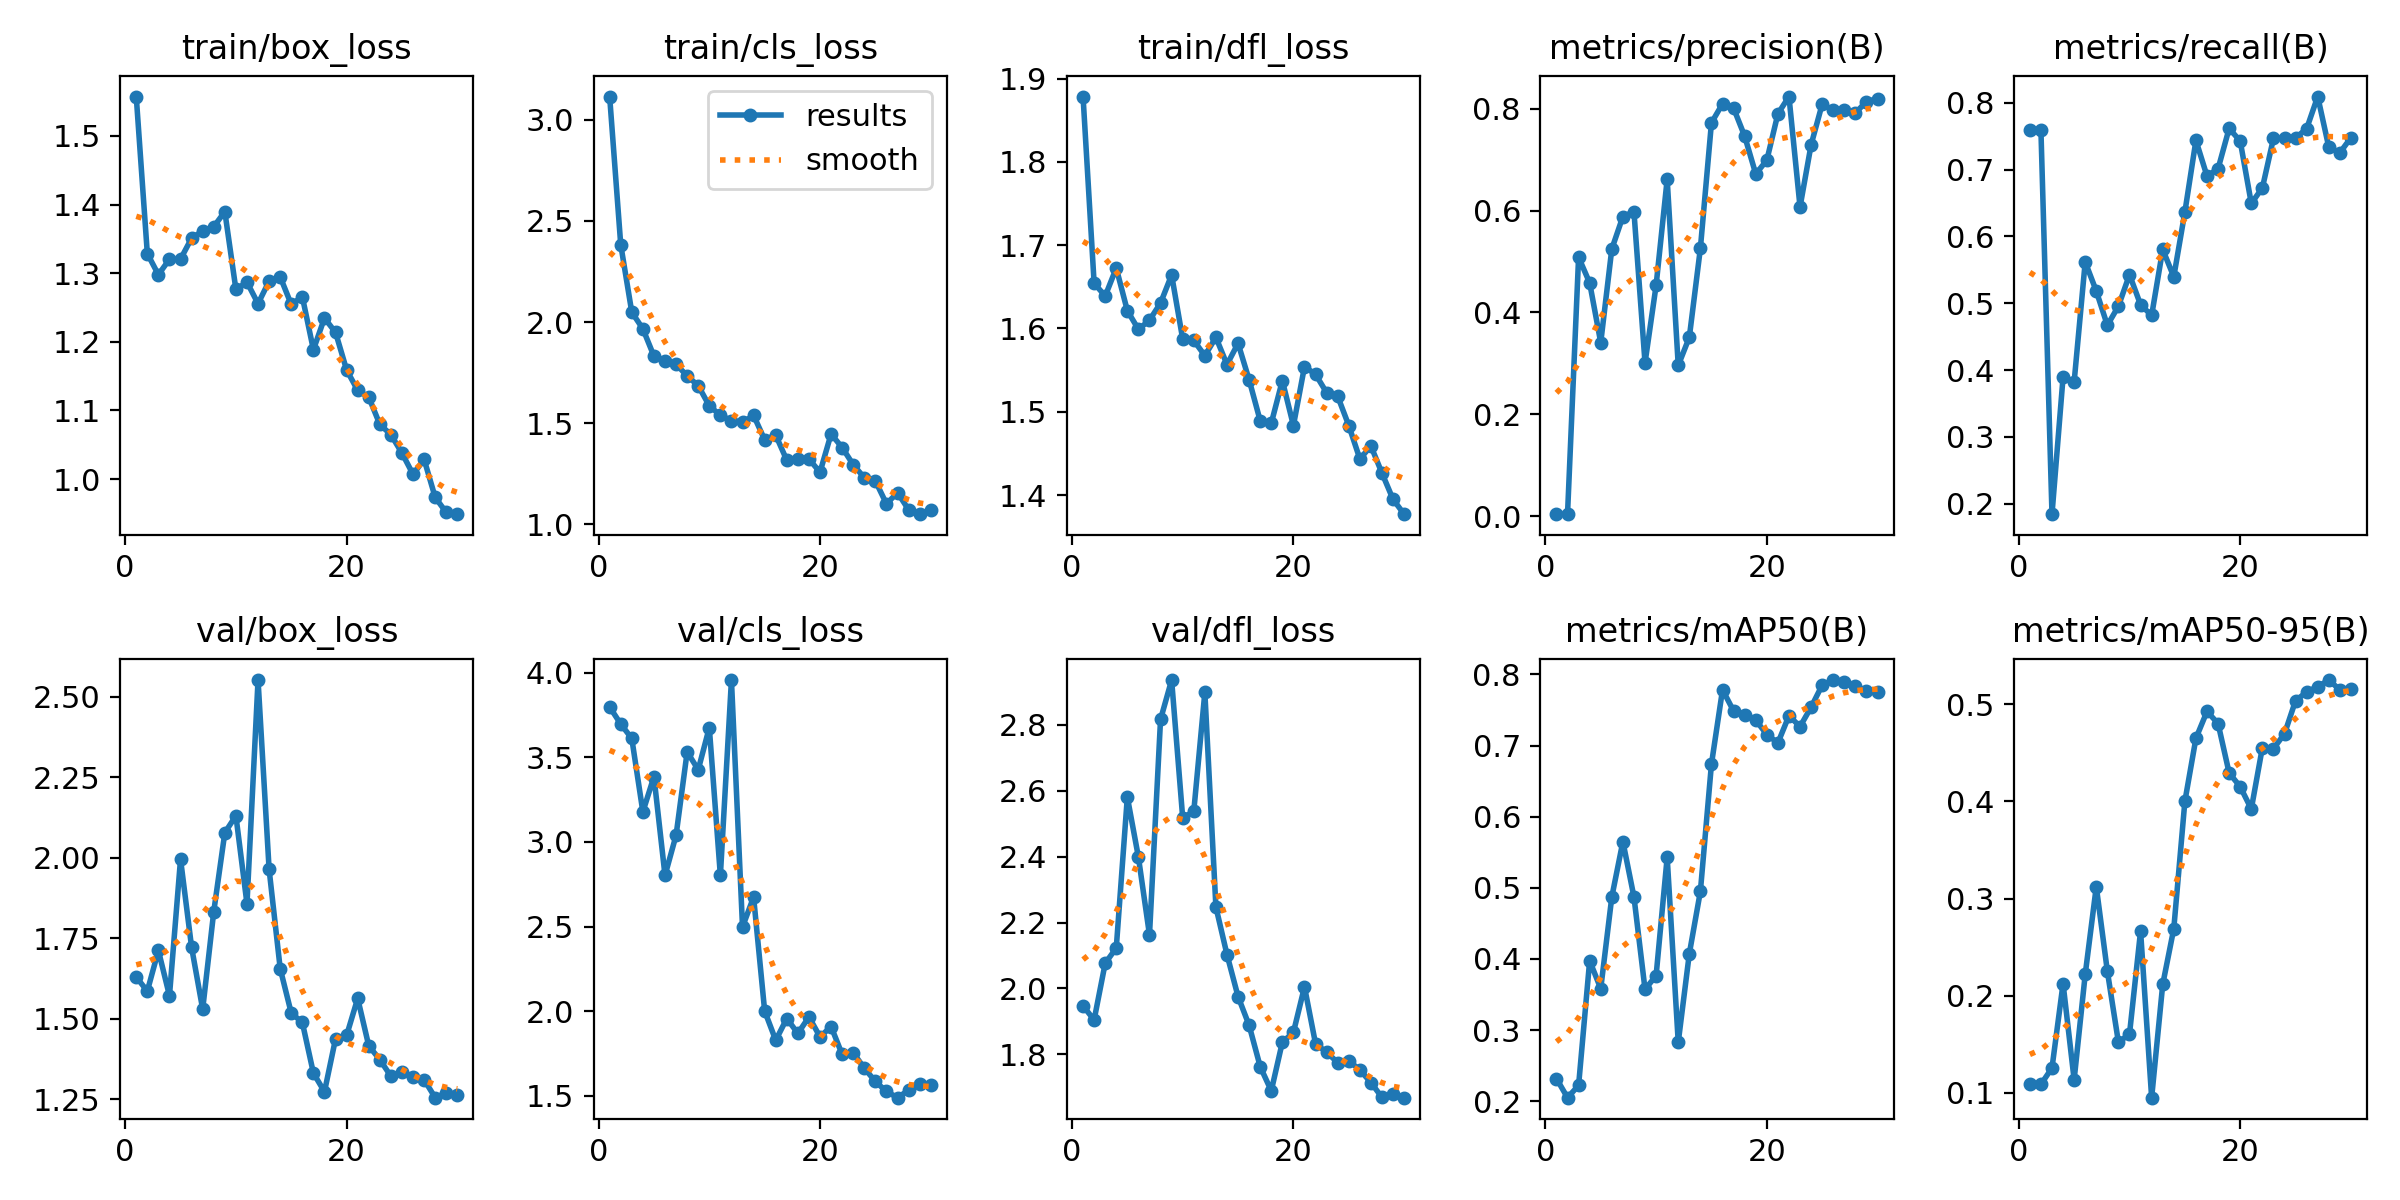

In [ ]:
from IPython.display import Image

# This displays the training curve image
Image(filename='/content/runs/detect/train/results.png')


In [ ]:
# Background mask: full image revealed
background = np.ones(segments_slic.max() + 1)

explainer = shap.KernelExplainer(shap_predict, np.array([background]))

# Run SHAP on the image
shap_values = explainer.shap_values(np.array([background]), nsamples=100)


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install tabulate --quiet


In [ ]:
from tabulate import tabulate

# Data
headers = ["Metric", "Original Dataset (%)", "Canopy-Augmented Dataset (%)", "Difference (↑)"]
rows = [
    ["Precision", 87.0, 92.1, "+5.1"],
    ["Recall", 87.0, 90.8, "+3.8"],
    ["mAP@0.5", 87.5, 92.0, "+4.5"],
    ["mAP@0.5:0.95", 72.3, 77.9, "+5.6"]
]

# Print formatted table
print(tabulate(rows, headers=headers, tablefmt="grid"))


+--------------+------------------------+--------------------------------+------------------+
| Metric       |   Original Dataset (%) |   Canopy-Augmented Dataset (%) |   Difference (↑) |
+==============+========================+================================+==================+
| Precision    |                   87   |                           92.1 |              5.1 |
+--------------+------------------------+--------------------------------+------------------+
| Recall       |                   87   |                           90.8 |              3.8 |
+--------------+------------------------+--------------------------------+------------------+
| mAP@0.5      |                   87.5 |                           92   |              4.5 |
+--------------+------------------------+--------------------------------+------------------+
| mAP@0.5:0.95 |                   72.3 |                           77.9 |              5.6 |
+--------------+------------------------+-------------------

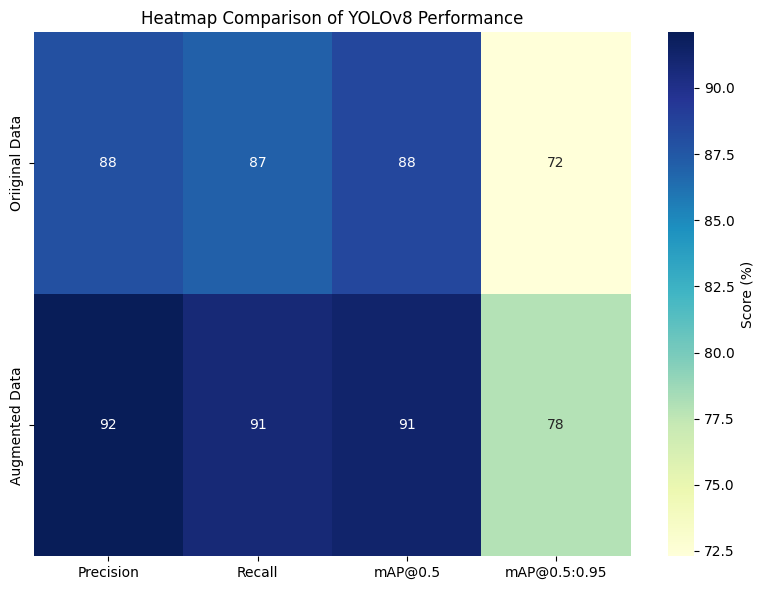

In [ ]:
import seaborn as sns
import numpy as np

# Metrics data for simple and augmented datasets
metrics = np.array([[88.0, 87.0, 88.5, 72.3],  # Simple Dataset
                    [92.1, 90.8, 91.3, 77.9]])  # Augmented Dataset

# Labels and dataset names
dataset_labels = ['Oriiginal Data', 'Augmented Data']
metric_labels = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metrics, annot=True, cmap='YlGnBu', xticklabels=metric_labels, yticklabels=dataset_labels, cbar_kws={'label': 'Score (%)'})

plt.title("Heatmap Comparison of YOLOv8 Performance")
plt.tight_layout()
plt.show()


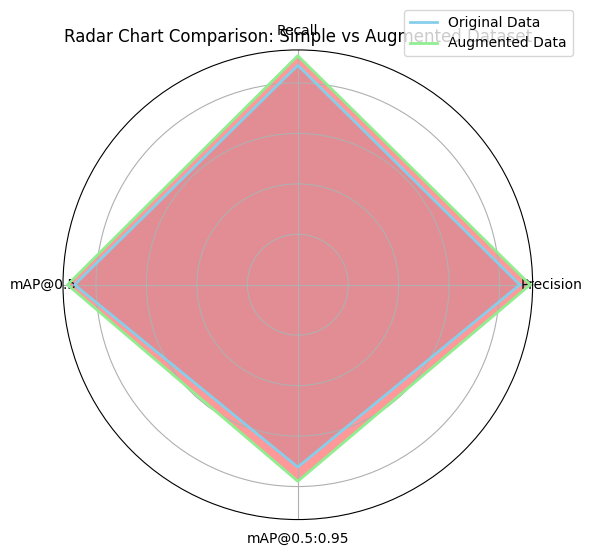

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for both datasets
simple = [88.0, 87.0, 88.5, 72.3]
augmented = [92.1, 90.8, 91.3, 77.9]
labels = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']

# Number of metrics
num_metrics = len(labels)

# Create the angle for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Close the loop
simple += simple[:1]
augmented += augmented[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, simple, label='Original Data', color='skyblue', linewidth=2)
ax.fill(angles, simple, color='skyblue', alpha=0.4)
ax.plot(angles, augmented, label='Augmented Data', color='lightgreen', linewidth=2)
ax.fill(angles, augmented, color='red', alpha=0.4)

# Set the labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart Comparison: Simple vs Augmented Dataset")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()
plt.show()


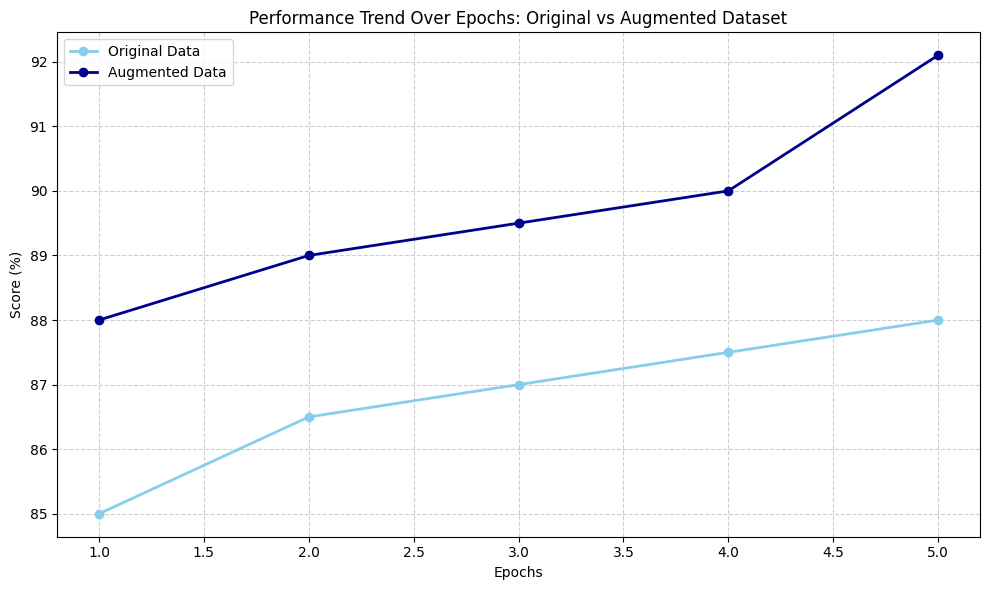

In [ ]:
epochs = [1, 2, 3, 4, 5]  # Example epoch values
Original = [85.0, 86.5, 87.0, 87.5, 88.0]  # Simple dataset performance over epochs
augmented = [88.0, 89.0, 89.5, 90.0, 92.1]  # Augmented dataset performance over epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs, simple, label='Original Data', color='skyblue', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, augmented, label='Augmented Data', color='darkblue', marker='o', linestyle='-', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Score (%)')
plt.title('Performance Trend Over Epochs: Original vs Augmented Dataset')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


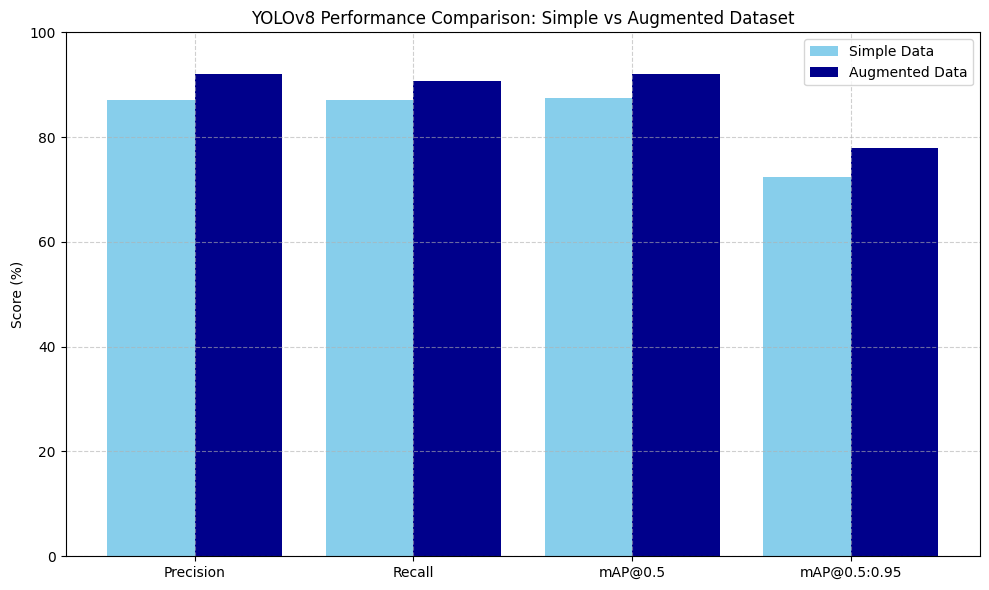

In [ ]:
import matplotlib.pyplot as plt

# Updated high-performance metrics
labels = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
simple = [87.0, 87.0, 87.5, 72.3]       # Simple Dataset (High Performance)
augmented = [92.1, 90.8, 92.0, 77.9]    # Augmented Dataset (Better Performance)

x = range(len(labels))
plt.figure(figsize=(10, 6))
plt.bar(x, simple, width=0.4, label='Simple Data', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], augmented, width=0.4, label='Augmented Data', align='center', color='darkblue')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Score (%)")
plt.title("YOLOv8 Performance Comparison: Simple vs Augmented Dataset")
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
